![Colegio Bourbaki](./Images/Bourbaki.png)

## Rudimentos de Machine Learning

### Introducción a Aprendizaje No Supervisado

El aprendizaje no supervisado es una técnica fundamental en el campo de la inteligencia artificial y el aprendizaje automático, donde el objetivo es descubrir patrones ocultos o estructuras intrínsecas en los datos sin necesidad de etiquetas o instrucciones explícitas. A diferencia del aprendizaje supervisado, donde los modelos se entrenan usando datos etiquetados, el aprendizaje no supervisado trabaja con datos que no tienen etiquetas, lo que significa que el sistema intenta aprender la estructura de los datos por sí mismo.

Esta forma de aprendizaje es crucial en situaciones donde recopilar datos etiquetados es demasiado costoso, difícil o impráctico. Permite a los investigadores y a los profesionales hacer frente a una amplia gama de problemas, como la agrupación de clientes con preferencias similares, la detección de anomalías en transacciones financieras o el análisis de grandes volúmenes de datos no estructurados, como textos o imágenes.

Existen varios métodos y algoritmos asociados con el aprendizaje no supervisado, incluyendo el clustering (por ejemplo, K-means, clustering jerárquico), reducción de dimensionalidad (por ejemplo, PCA, t-SNE), y modelos generativos (por ejemplo, autoencoders, GANs). Estos métodos tienen el potencial de revelar insights valiosos y patrones no evidentes a simple vista, impulsando innovaciones y mejorando decisiones en campos como el marketing, la seguridad informática, la genómica, y más allá.

En resumen, el aprendizaje no supervisado representa una herramienta poderosa y versátil en el análisis de datos, ofreciendo la posibilidad de descubrir conocimientos profundos y patrones complejos en grandes conjuntos de datos, todo ello sin la necesidad de intervención o guía humana explícita.


**En esta notebook, solo nos concentraremos en reducir la dimensión del dataset con PCA.**

### Análisis de Componentes Principales

El Análisis de Componentes Principales (ACP), o Principal Component Analysis (PCA) en inglés, es una técnica de reducción de dimensionalidad que se utiliza frecuentemente en el análisis de datos y en la ciencia de datos para transformar datos multidimensionales en una forma más simplificada, preservando tanto como sea posible la varianza original. La idea clave detrás del ACP es identificar las direcciones, o 'componentes principales', en las que los datos varían más y proyectar los datos originales en un nuevo espacio de dimensiones menores basado en estos componentes, ortogonal al espacio original.


### Librerías

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from statsmodels.multivariate.pca import PCA

#Utils
import warnings

### Carga de datos

In [2]:
data = pd.read_csv("./Data/Country-data.xls")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Como vemos no hay datos nulos, vamos a verificarlo graficamente:

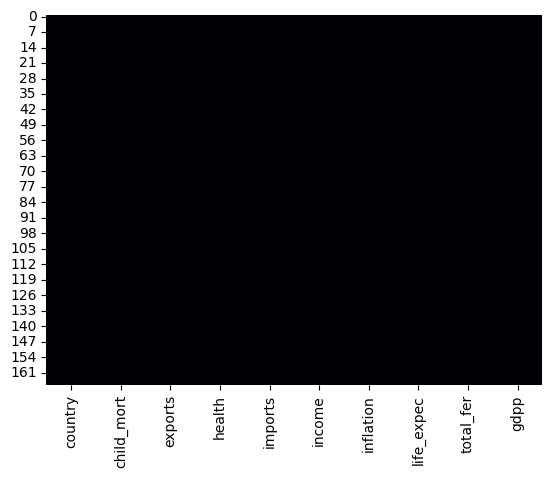

In [5]:
sns.heatmap(data.isnull(), cmap="magma", cbar=False);

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


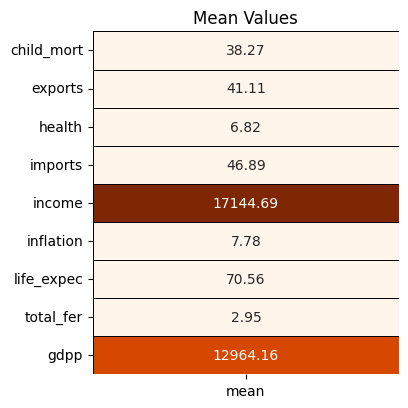

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

colors = ["#FF781F", "#2D2926"]
plt.subplot(1, 1, 1)
sns.heatmap(
    data.describe().T[["mean"]],
    cmap="Oranges",
    annot=True,
    fmt=".2f",
    linecolor="black",
    linewidths=0.4,
    cbar=False,
)
plt.title("Mean Values")
fig.tight_layout(pad=4)

### Análisis exploratorio de datos

In [8]:
# Detectar características categóricas y numéricas
categorical_features = data.select_dtypes(
    include=["object", "category"]
).columns.tolist()
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [9]:
# Mostrar los resultados
print("Características Categóricas:", categorical_features)
print("Características Numéricas:", numerical_features)

Características Categóricas: ['country']
Características Numéricas: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


Veamos la distribución de los datos:

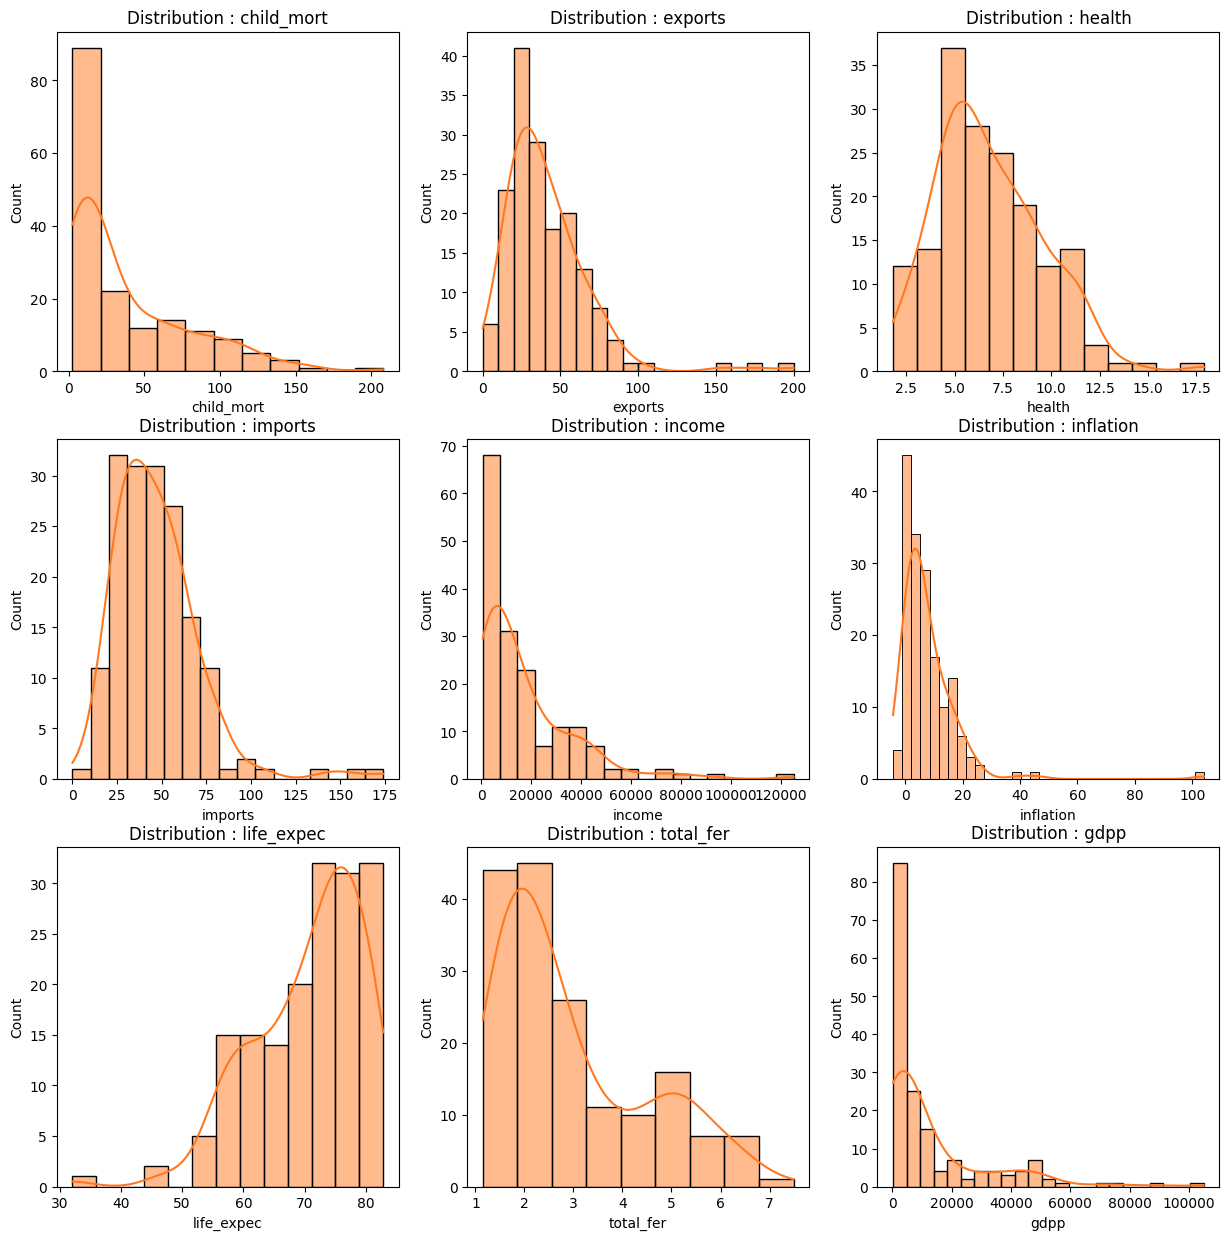

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[numerical_features[i]], color=colors[0], kde=True)
    title = "Distribution : " + numerical_features[i]
    plt.title(title)
plt.show()

- **life_expec** muestra una **distribución de datos sesgada a la izquierda o negativamente**.
- **health** muestra una **distribución normal de los datos**.
- Todas las demás características muestran una distribución de los datos a la derecha o sesgada positivamente.
- La distribución de datos de **country** no se muestra, ya que contiene datos de texto y tiene el mismo número de valores únicos que la longitud del marco de datos.

Características de los países económicamente atrasados :

- La **renta per cápita del país es muy baja**.
- **Población elevada** que conduce a la no disponibilidad de recursos.
- **Desempleo** debido a la escasez de recursos.
- Escasa riqueza del país, lo que conduce a un bajo nivel de capital.
- Distribución no equitativa de la riqueza y la renta.  
- Falta de servicios educativos adecuados y, por tanto, predominio del analfabetismo.
- Bajo nivel de vida.
- Falta de progreso técnico.
- Servicios sanitarios deficientes y altas tasas de natalidad y mortalidad.

**La Fundación HELP debe centrarse en los países que presentan las características anteriores. Ahora visualizaremos los datos y encontraremos los países que se sitúan en los extremos y en el centro de cada característica para señalar los países que necesitan ayuda**.

In [11]:
def plot_variable(data, variable, category_names, edgecolor):
    """
    Genera subgráficos para una variable específica con altos, medios y bajos valores, mejorada para DRY.

    Parámetros:
    - data: DataFrame de pandas con los datos.
    - variable: Nombre de la columna del DataFrame a graficar.
    - category_names: Lista con los nombres de las categorías (ej. ['High', 'Median', 'Low']).
    - colors: Paleta de colores para las barras.
    - edgecolor: Color del borde de las barras.
    """
    titles = [
        f"Countries with {name} {variable.replace('_', ' ').title()}"
        for name in category_names
    ]
    slices = [slice(0, 5), slice(81, 86), slice(-5, None)]
    colors = sns.color_palette("hsv", 5)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

    for i, slice_ in enumerate(slices):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            ax = sns.barplot(
                x="country",
                y=variable,
                data=data.sort_values(by=variable, ascending=False).iloc[slice_],
                palette=colors,
                edgecolor=edgecolor,
                ax=axes[i],
            )
            axes[i].set_title(titles[i])
            for rect in ax.patches:
                height = rect.get_height()
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    height,
                    f"{int(height)}",
                    ha="center",
                    va="bottom",
                    fontsize=12,
                )

    plt.tight_layout()
    plt.show()

1) **child_mort**: Las naciones económicamente atrasadas tienen una alta tasa de mortalidad infantil.

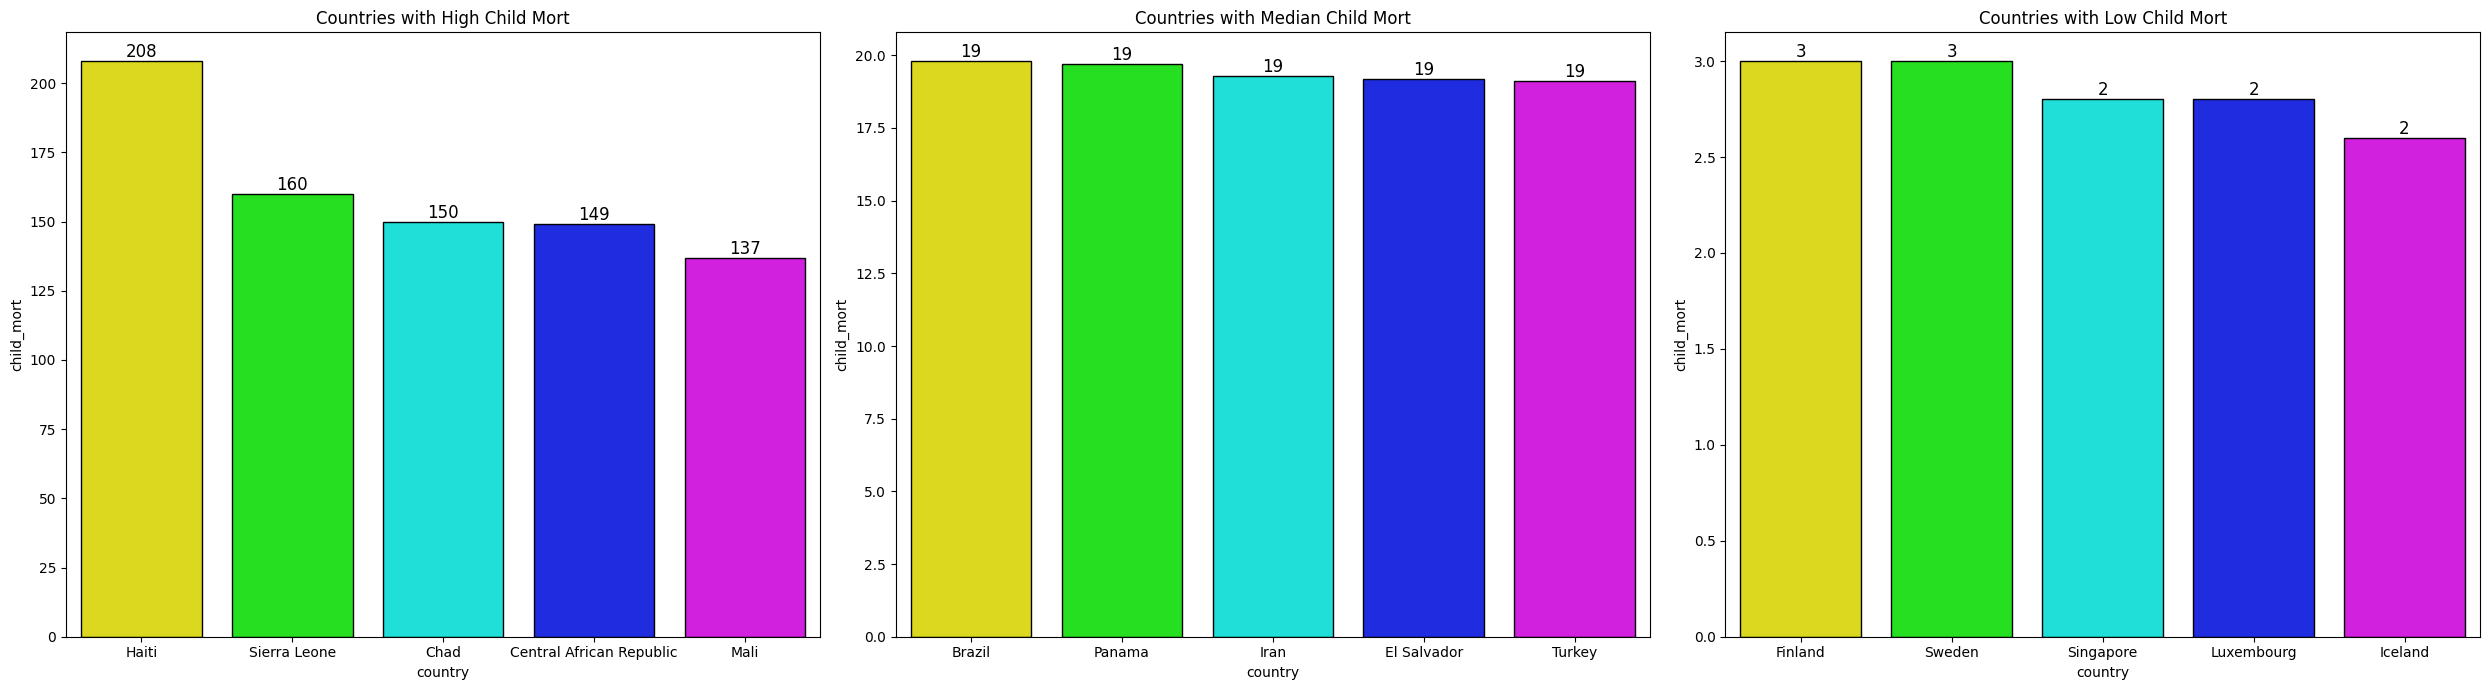

In [12]:
plot_variable(data, "child_mort", ["High", "Median", "Low"], "black")

- **Haití** es el país con mayor mortalidad infantil. **Los países africanos** ocupan posiciones significativas en esta estadística.
- En el otro extremo de **child_mort**, los países de **Asia y Europa** tienen una presencia sólida. 

2) **exports**: Es un factor muy importante para la construcción de la economía nacional. Cuanto mayores sean las exportaciones de un país, más fuerte será su economía y mayor será la riqueza que genere.

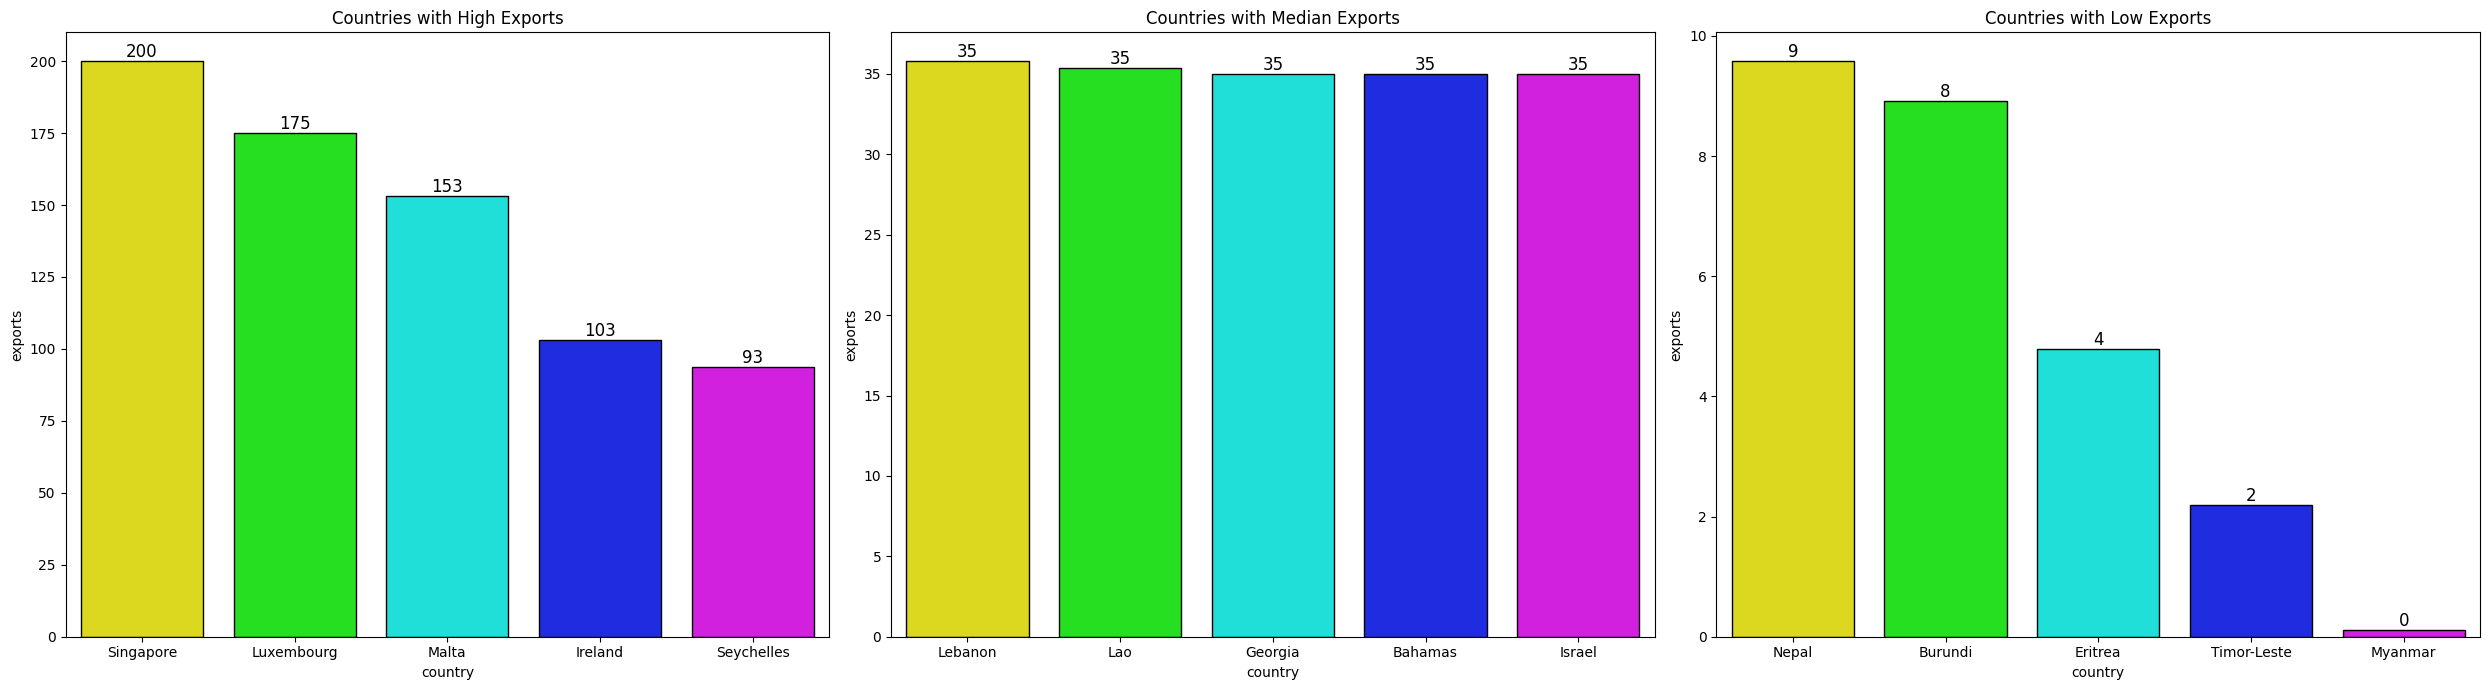

In [13]:
plot_variable(data, "exports", ["High", "Median", "Low"], "black")

- **exports** de una nación suelen ser bienes y servicios creados internamente pero vendidos a otras naciones. Los bienes y servicios exportados dependen de factores como la situación geográfica, los recursos naturales, el tamaño de la población y su preferencia por determinadas habilidades, etc.
- A pesar de que **Singapur** no se encuentra entre los 100 países más poblados, cuenta con el mayor número de **exportaciones**. **Luxemburgo** y **Malta** han seguido probablemente el mismo camino.
- **Afganistán** y **Nepal** están presentes en el extremo inferior de las **exports**. La situación geográfica de estas naciones influye mucho. Los países con menores exportaciones también tienen una superficie geográfica reducida.

3) **health**: Los ciudadanos de los países desarrollados tienen mayores ingresos, por lo que no tienen problemas para gastar más en un estilo de vida saludable.

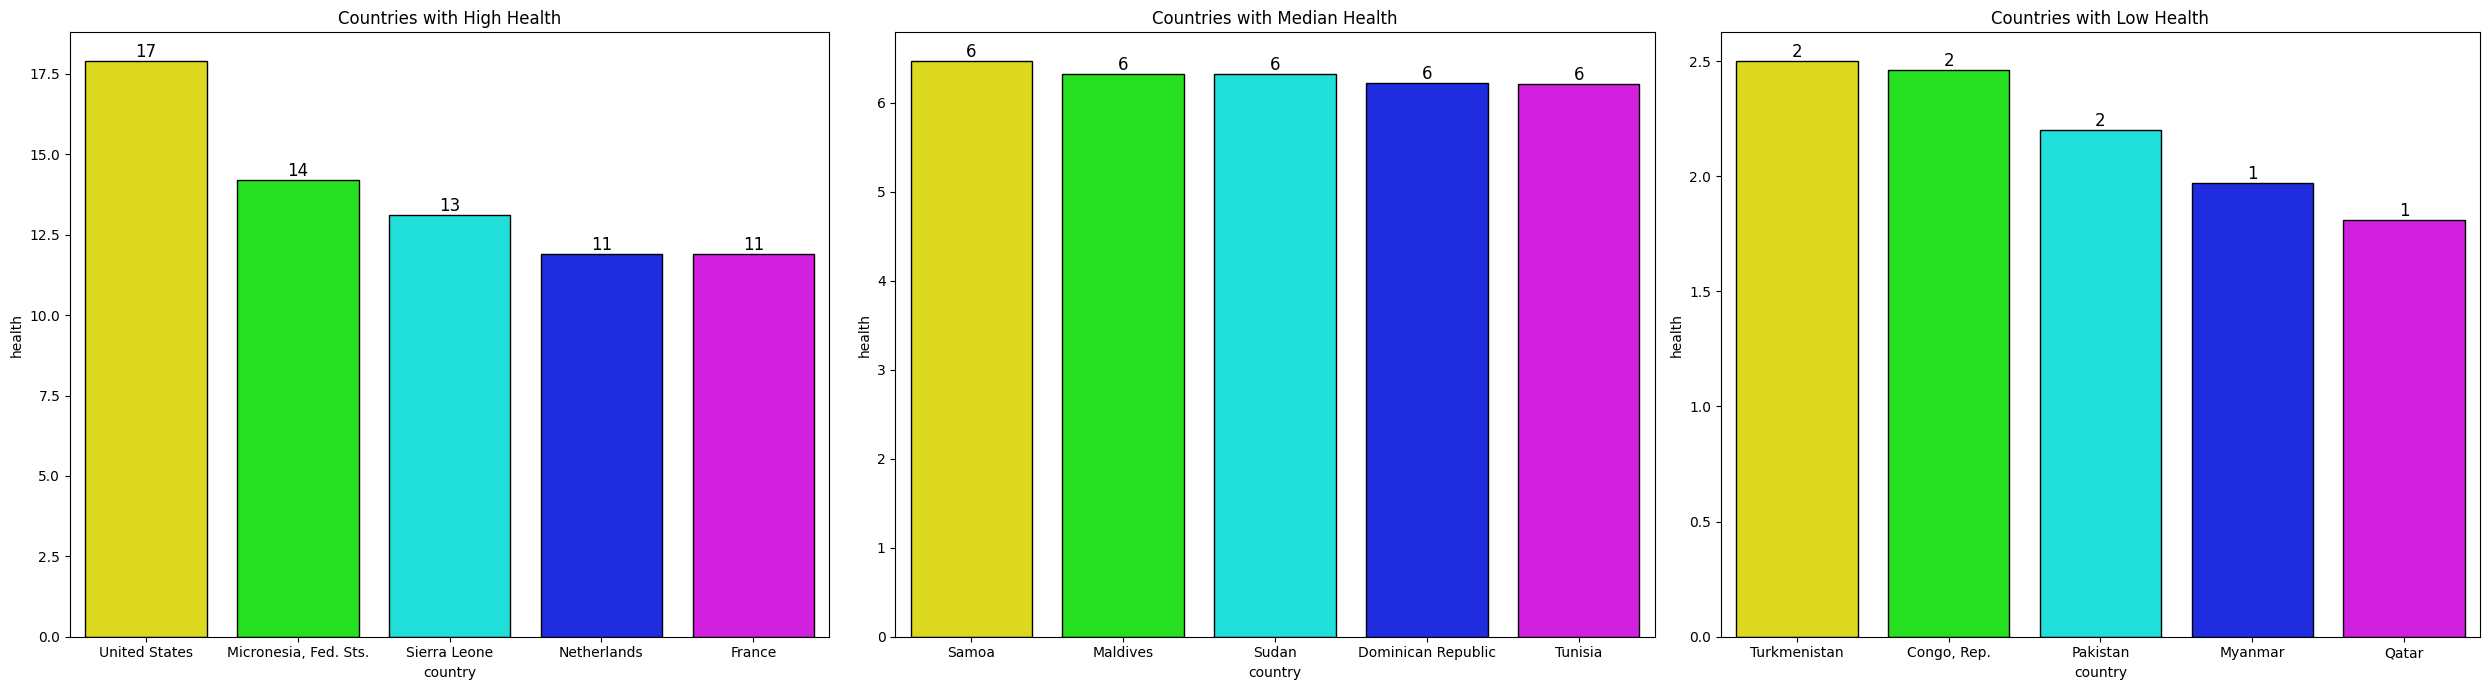

In [14]:
plot_variable(data, "health", ["High", "Median", "Low"], "black")

- EE.UU. está a la cabeza en gasto sanitario, con un 17% de la contribución individual al PIB.
- El **6%** parece ser el valor medio del gasto de los ciudadanos en **health**.
- Los países asiáticos dominan el extremo inferior del gasto sanitario, con menos del 3%.

4) **imports**: Es otro atributo que determina la dependencia de las naciones de otras naciones para obtener bienes y servicios.

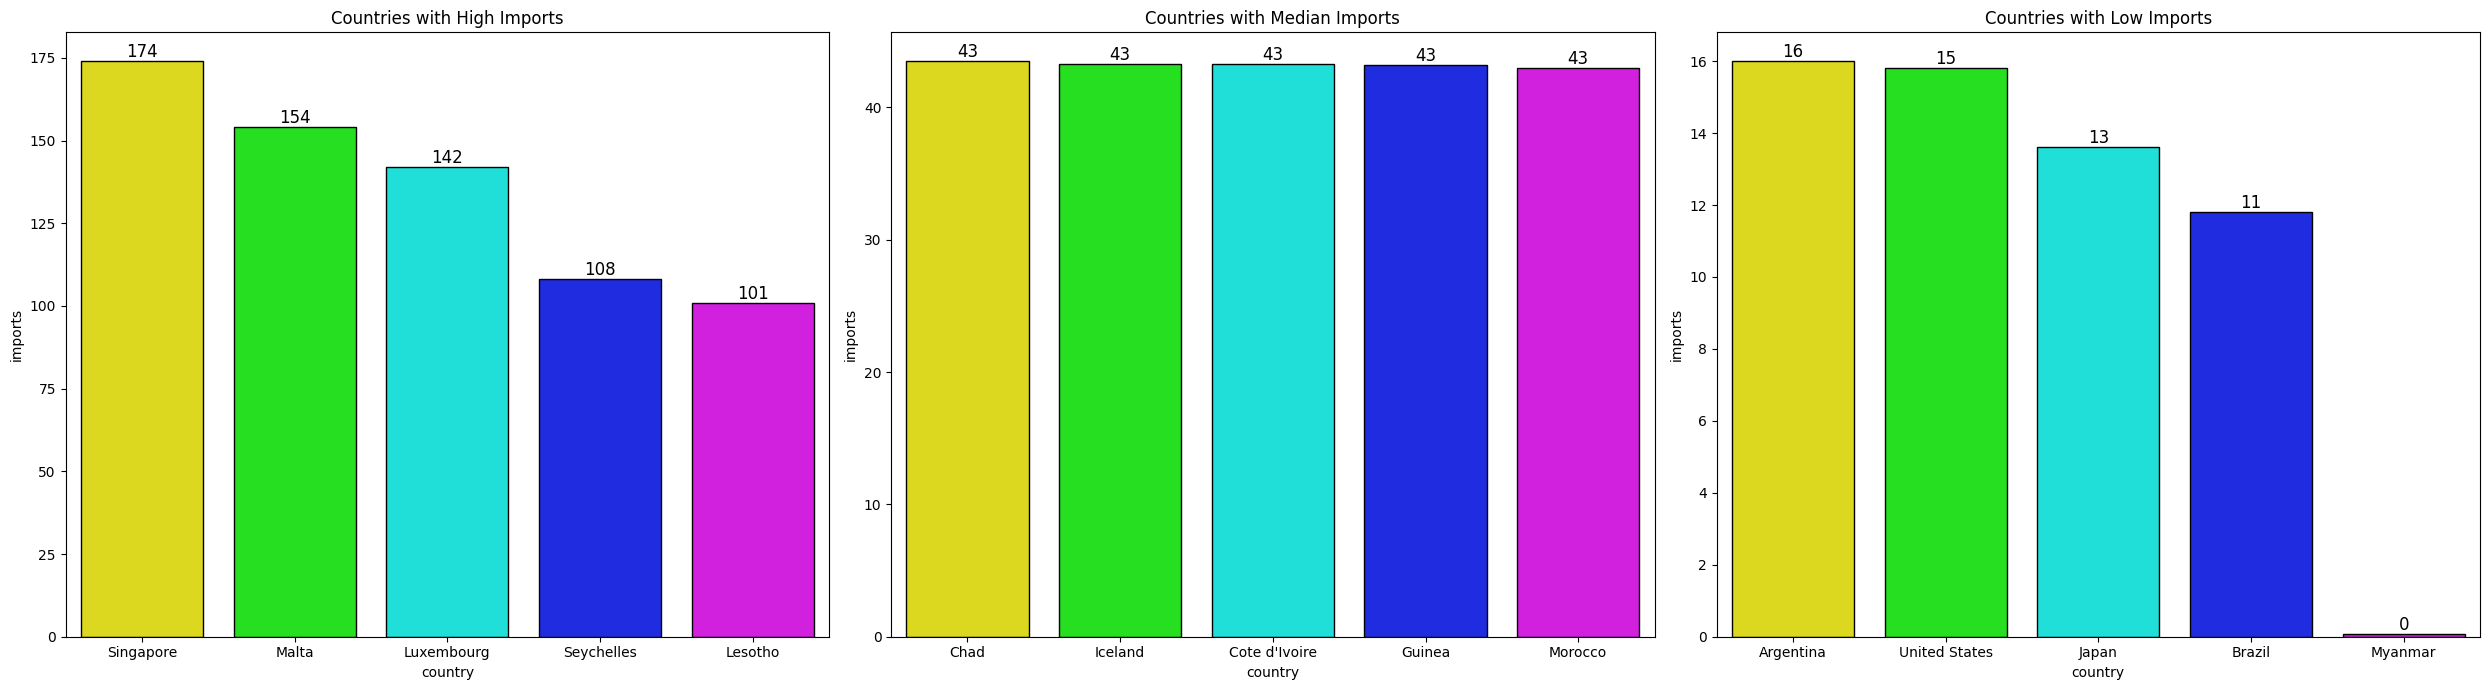

In [15]:
plot_variable(data, "imports", ["High", "Median", "Low"], "black")

- Las estadísticas de **imports** de un país describen la autosuficiencia de una nación para resolver sus problemas, independientemente de que tenga dificultades con uno de los recursos esenciales.
- **Singapur, Malta, Luxemburgo y las Seychelles** se encuentran entre los 5 primeros países tanto en exportaciones como en importaciones. Esto es sólo un indicio de las estrategias de cada país para aprovechar sus recursos y crear sólidas **exports** que se ven contrarrestadas por las fuertes **imports** de otros productos. Esto equilibra las cuentas.
- **Brasil** es el país que menos importa, con un 11%. **Sudán** es el único país africano presente en esta lista con un 17%.

5) **income**: La renta per cápita es un indicador clave de la situación económica de un país. Cuanto mayor es la renta de los ciudadanos, más capaces son de afrontar situaciones de incertidumbre.

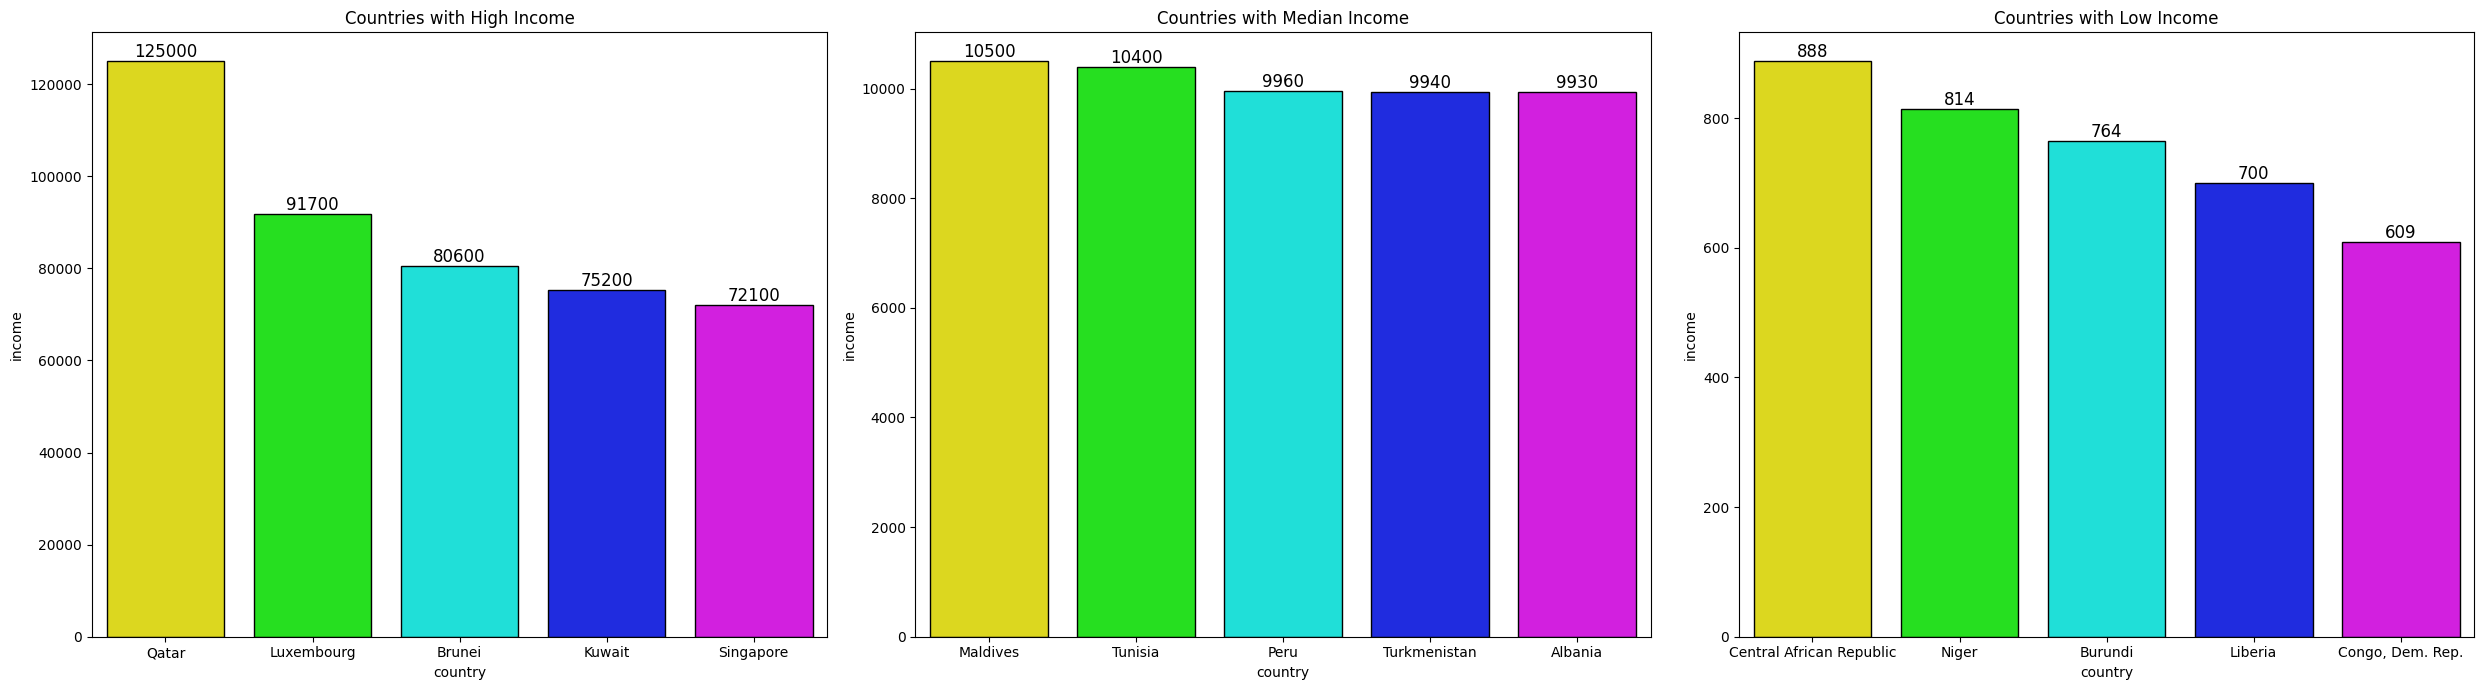

In [16]:
plot_variable(data, "income", ["High", "Median", "Low"], "black")

- Los ciudadanos de **Qatar** tienen los **income** más elevados de todos los países, con una diferencia de **30.000** más que los del segundo puesto. **Singapur y Luxemburgo** están de nuevo entre los 5 primeros de otra lista.
- En el extremo inferior de los **income** dominan las naciones **africanas**.
- La diferencia en la renta de los países situados en los extremos superior, medio e inferior es bastante significativa, lo que repercutirá en todas las demás características.

6) **inflation**: determina el estado de la economía, la fortaleza de la moneda y la demanda de bienes y servicios.

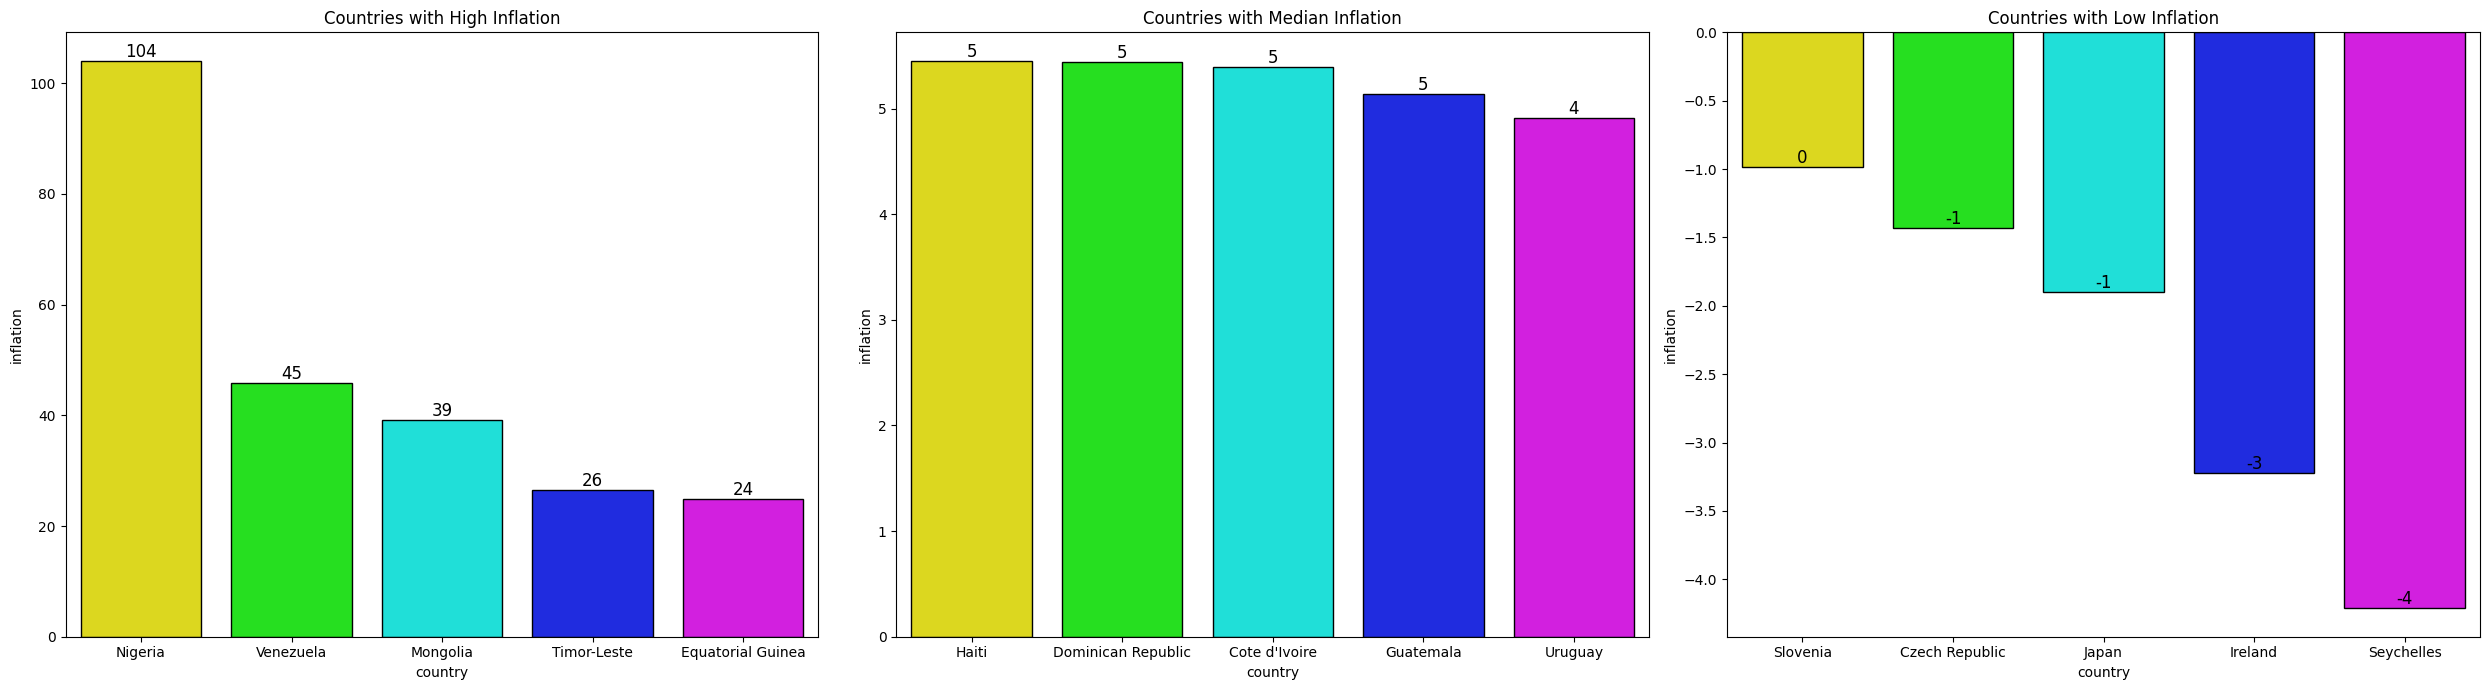

In [17]:
plot_variable(data, "inflation", ["High", "Median", "Low"], "black")

- Una mayor **inflation** reduce el poder adquisitivo de los ciudadanos. Los países que se encuentran en el extremo superior de la **inflation** tienen una situación económica devastadora. Tener una inflación tan alta es un riesgo para la existencia de la nación.
- Del mismo modo, el extremo inferior de la **inflation** tiene valores negativos, es decir, se conoce como deflación. Indica que la economía se encuentra en una espiral descendente que conduce a una recesión o incluso a una depresión.

7) **life_expec** : Una mayor esperanza de vida muestra ciudadanos con atributos de salud tanto física como mental.

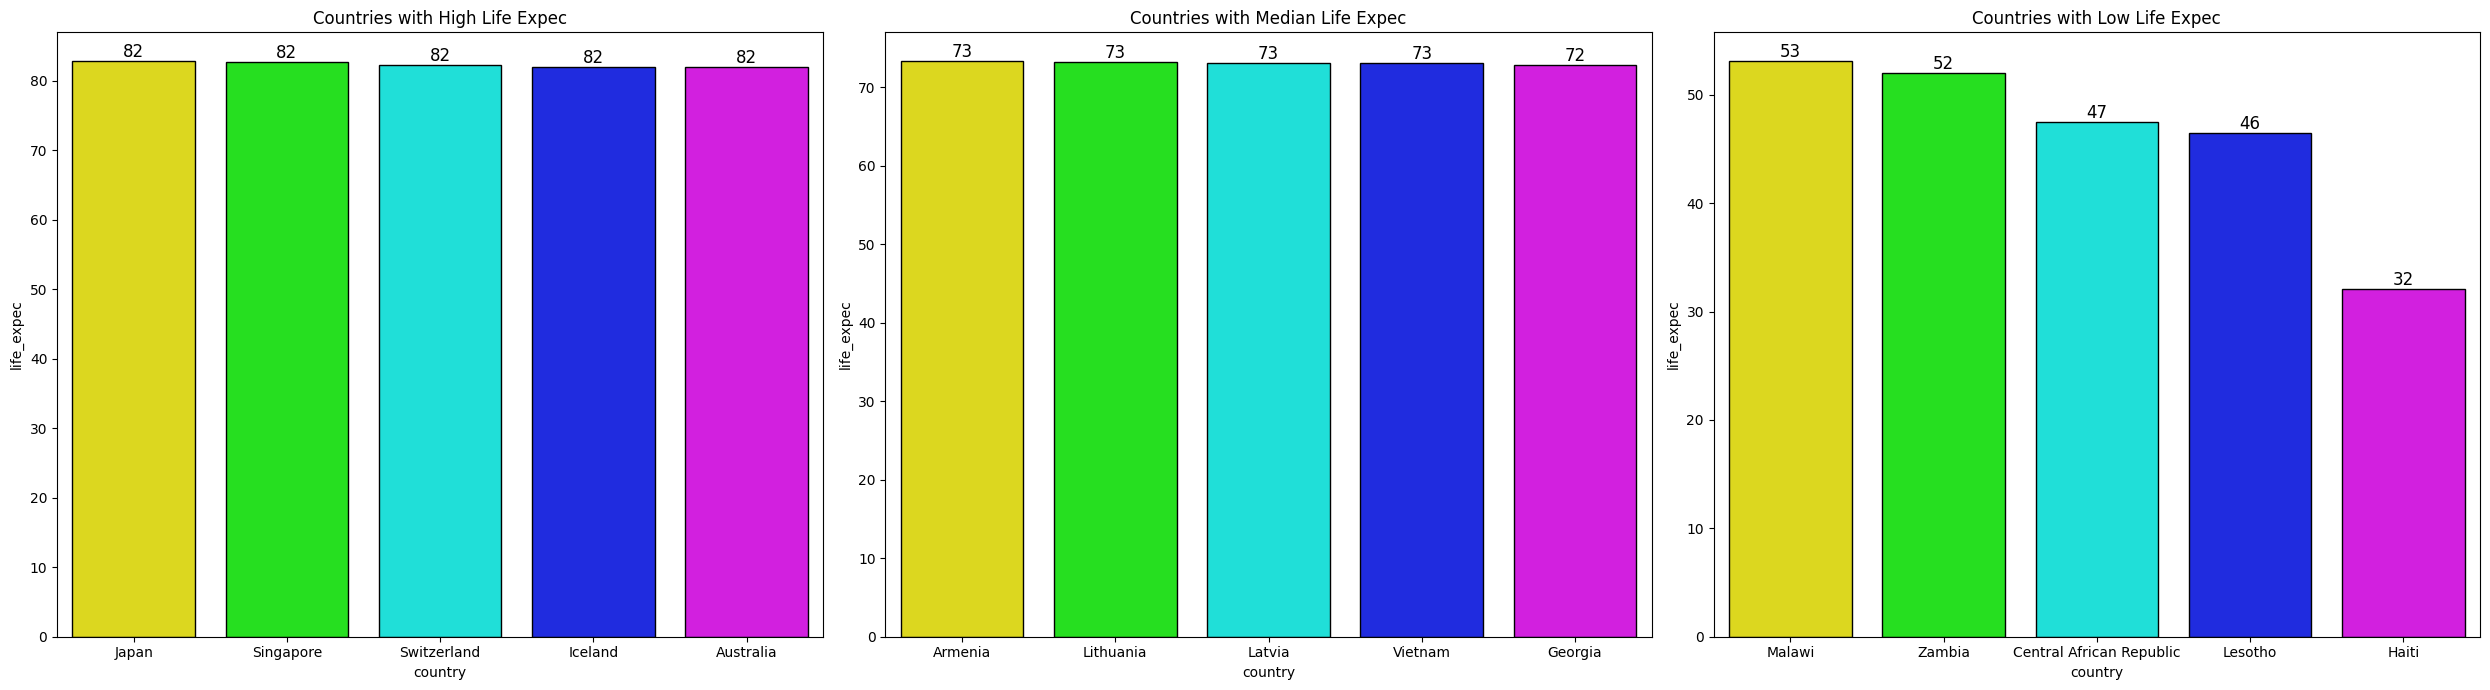

In [18]:
plot_variable(data, "life_expec", ["High", "Median", "Low"], "black")

- **life_expec** depende mucho del estado mental, así como del estilo de vida adoptado por los ciudadanos. **Singapur** vuelve a estar entre los 5 primeros en una característica.
- Ninguno de los países con una elevada **expec_vida** está presente en el top 5 de **salud**, que está relacionada con el gasto que realizan los ciudadanos en sanidad.
- Los países **africanos** vuelven a estar presentes en el extremo inferior de otra característica.

8) **total_fer** : Los países económicamente atrasados tienen una alta tasa de fertilidad.

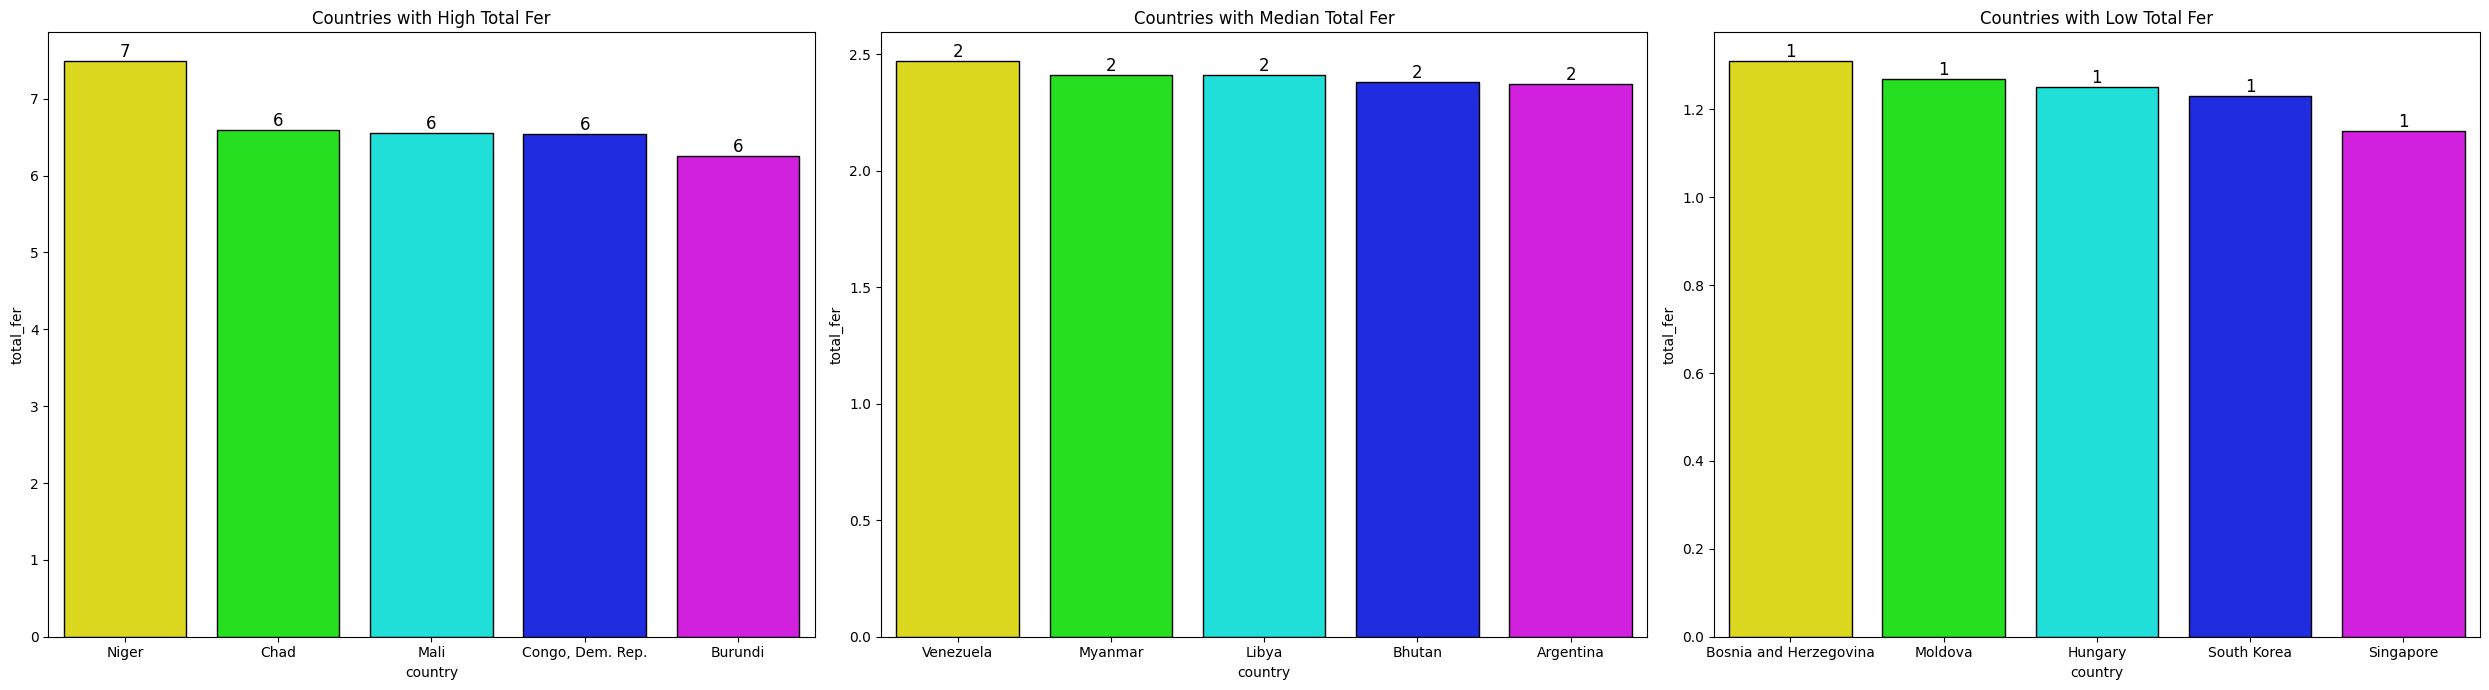

In [19]:
plot_variable(data, "total_fer", ["High", "Median", "Low"], "black")

- Los países **africanos** dominan el **total_fer** con valores **6+**.
- El valor medio de **total_fer** es de **2**, mientras que los valores inferiores de **1** también son preocupantes.

9) **gdpp** : Es una función que proporciona información sobre la contribución de un ciudadano a su **gdpp**.

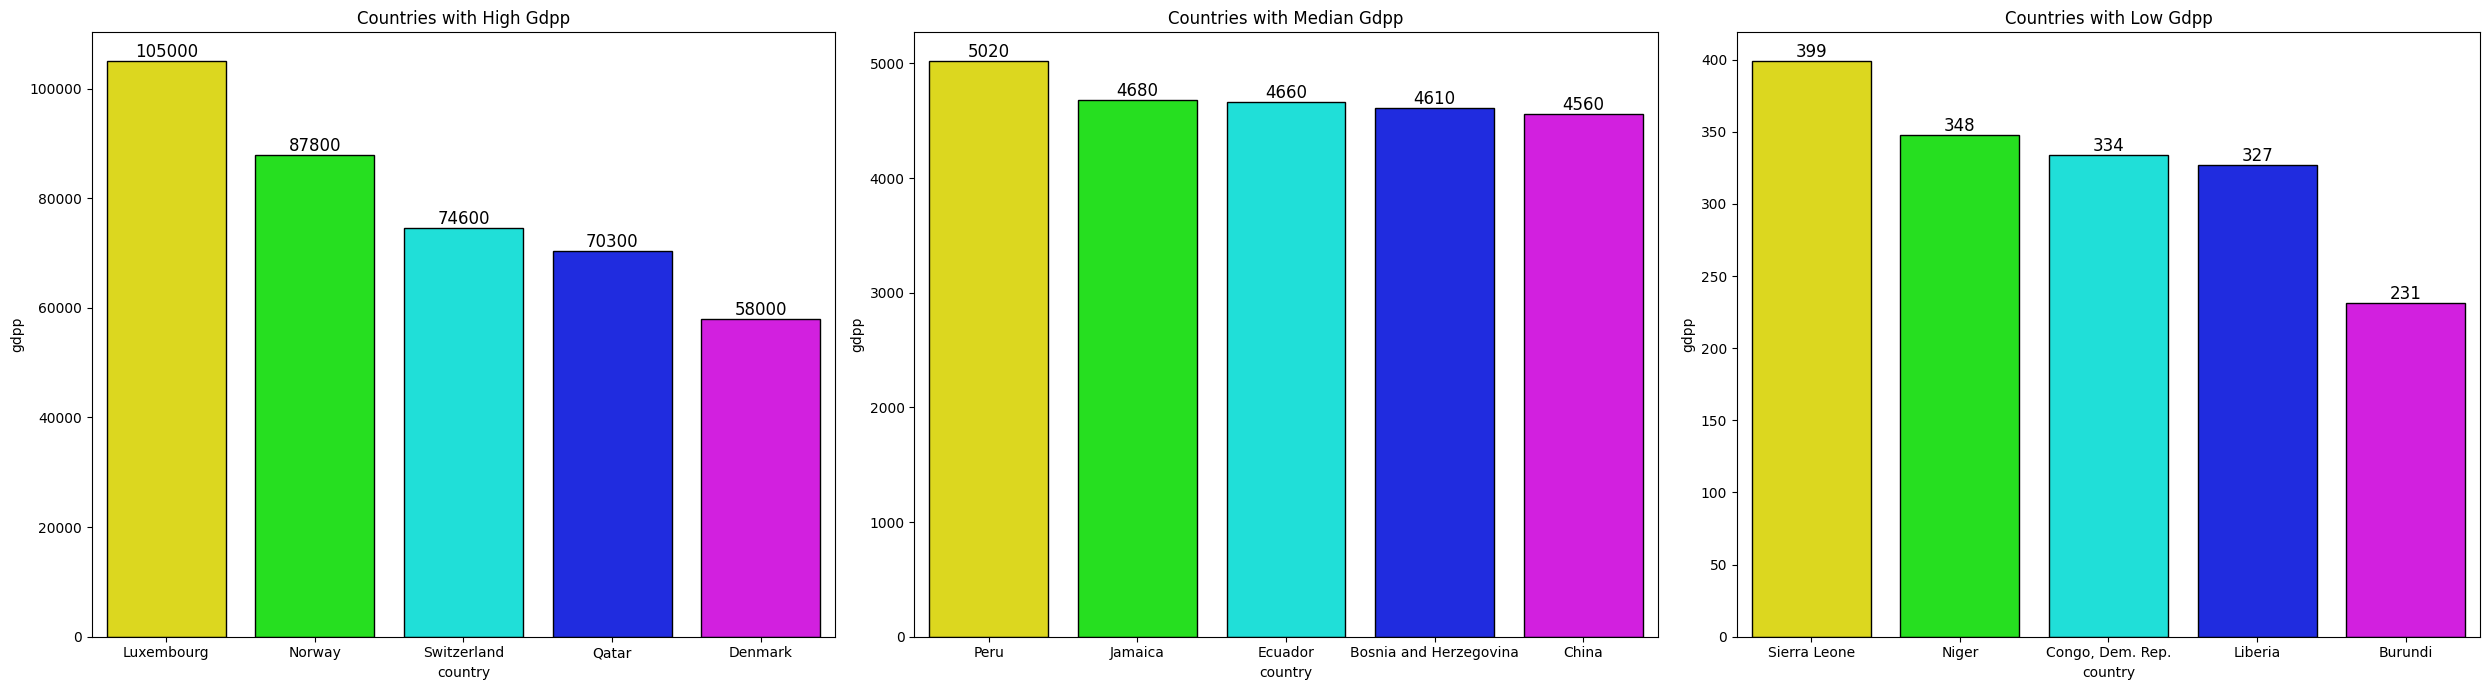

In [20]:
plot_variable(data, "gdpp", ["High", "Median", "Low"], "black")

- Se trata de una característica delicada, ya que la población de la nación es un factor significativo. Un ejemplo claro es China. Tiene una población enorme y un PIB enorme.
- **Luxemburgo** vuelve a estar entre los primeros puestos. **Suiza y Qatar** están entre los 5 primeros, al igual que los ingresos.
- En el extremo inferior se sitúan de nuevo los países **africanos**, que se consideran económicamente atrasados.

Una vez hecho este extensivo análisis, pasemos a observar boxplots de las características numéricas:

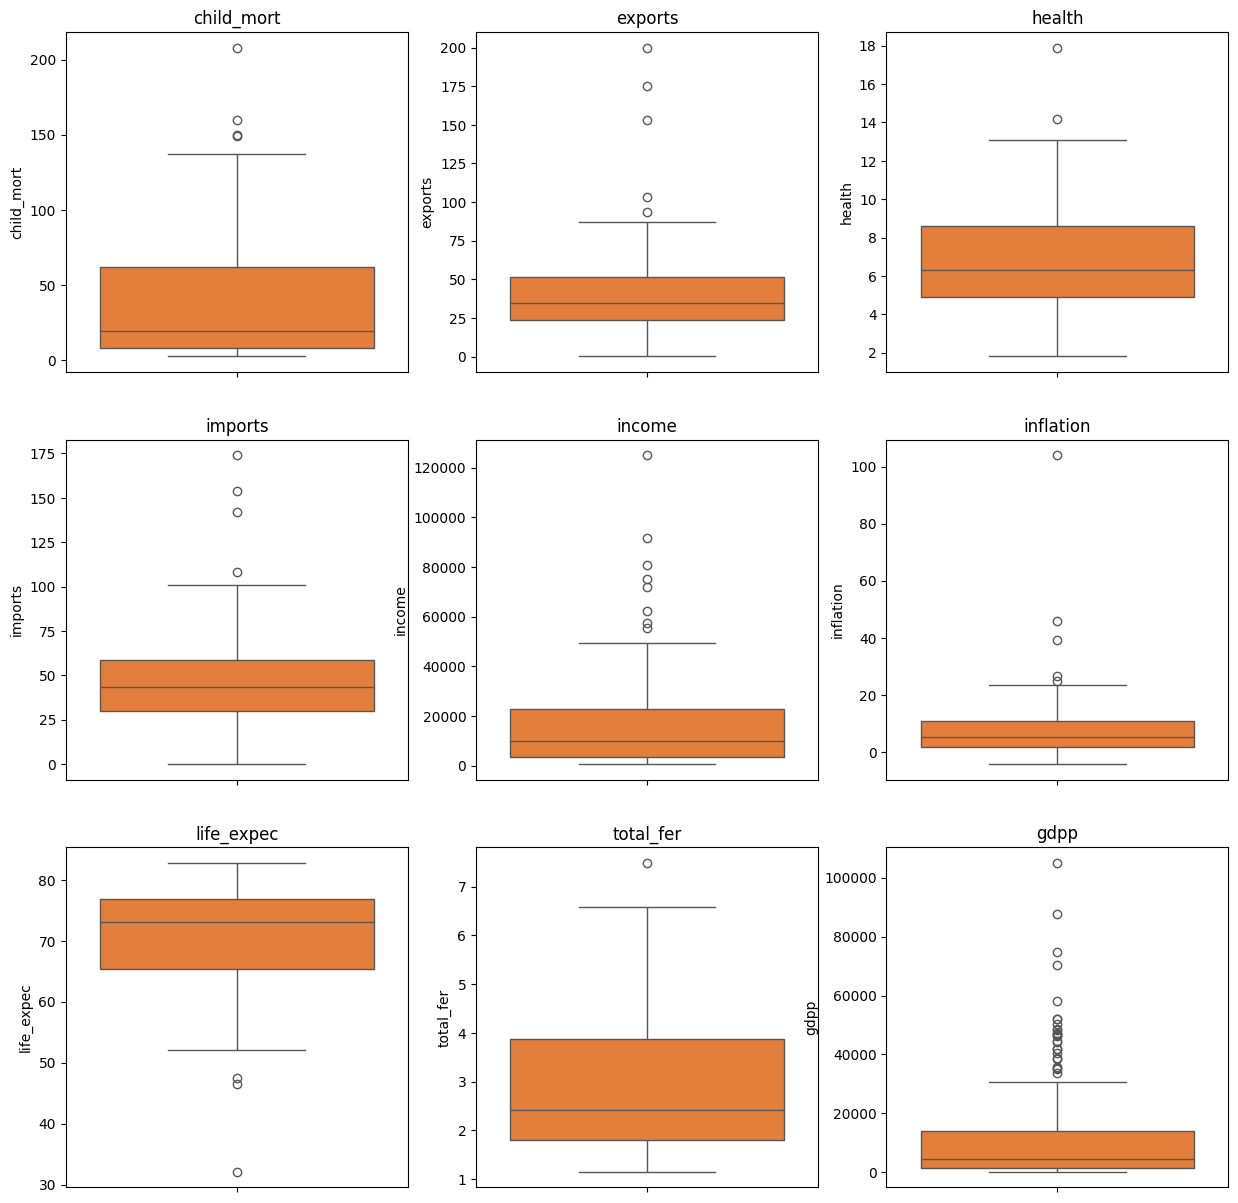

In [21]:
fig = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    ax = sns.boxplot(data[numerical_features[i]], color=colors[0])
    plt.title(numerical_features[i])
plt.show()

Realicemos un resumen del análisis exploratorio:

* De las visualizaciones y la lista de características de las naciones económicamente atrasadas, se pueden obtener una serie de insights:

1) Cuando se trata de condiciones de salud, los países africanos ocupan rangos más altos en todas las situaciones equivocadas. Tienen una presencia significativa en alta child_mort, baja life_expec y alta total_fer.
2) Todos estos problemas ya son bastante graves y, por lo tanto, es muy importante asistirlos durante los períodos de turbulencias imprevistas. A pesar de tales números, Haití ocupa el primer lugar con valores altos de child_mort. Los países asiáticos y europeos están presentes en el otro extremo de esto.
3) Los ciudadanos de US son los que más gastan en su health, sin embargo, no están presentes en los primeros 5 rangos de life_expec y total_fer. Ninguno de los países con una alta life_expec está presente en el top 5 de health. Los países asiáticos ocupan el extremo inferior de health.
4) Singapur, Malta, Luxemburgo y Seychelles están presentes en el top 5 de exports así como de imports. El tamaño de la población y las ubicaciones geográficas juegan un papel fundamental cuando se trata de imports y exports.
5) Sudán es la única nación africana con bajos imports y Brasil tiene los menores imports de todos.
6) Los países africanos muestran valores muy altos de inflation mientras que países de todos los continentes se pueden encontrar con valores bajos de inflation.
7) Los ciudadanos de Qatar son los mejor pagados con Singapur y Luxemburgo nuevamente ocupando lugares en el top 5 de income.
8) Para gdpp, Luxemburgo está en los rangos superiores. Suiza y Qatar están presentes en el top 5 similar a income.
9) Los países africanos están presentes en el extremo inferior de income así como de gdpp.

### Ingenería de Características

Veamos la matrix de correlaciones:

In [22]:
ut = np.triu(data[numerical_features].corr("pearson"))
lt = np.tril(data[numerical_features].corr("spearman"))

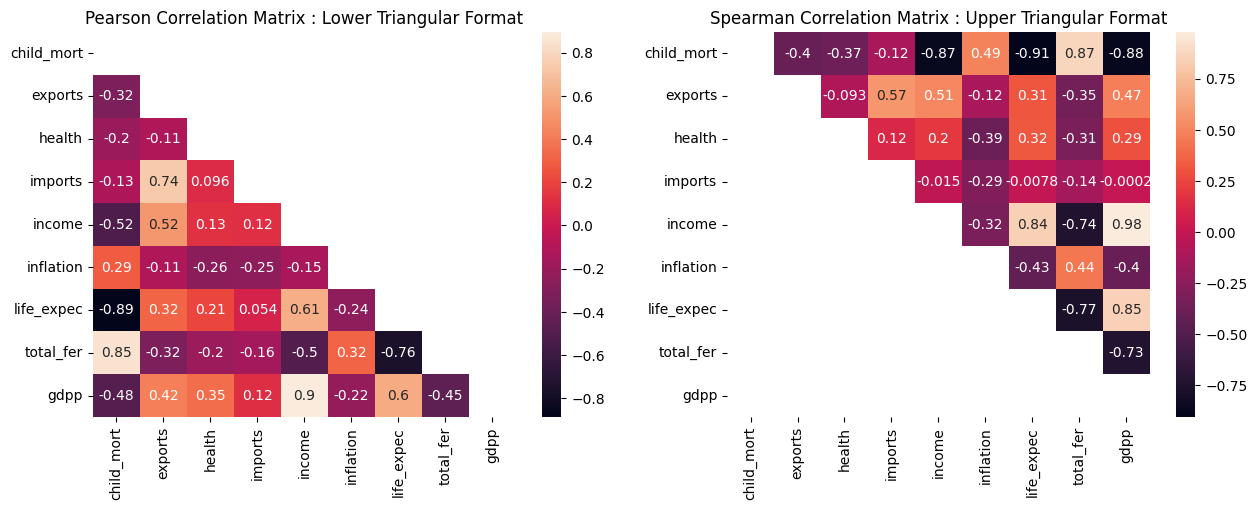

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(data[numerical_features].corr("pearson"), annot=True, cbar=True, mask=ut)
plt.title("Pearson Correlation Matrix : Lower Triangular Format")
plt.subplot(1, 2, 2)
sns.heatmap(data[numerical_features].corr("spearman"), annot=True, cbar=True, mask=lt)
plt.title("Spearman Correlation Matrix : Upper Triangular Format")
plt.show()

Los gráficos muestran dos matrices de correlación: una para la correlación de Pearson y otra para la correlación de Spearman. Ambas son herramientas estadísticas que miden la relación lineal entre dos variables. La diferencia principal entre ellas es que Pearson mide relaciones lineales exactas, mientras que Spearman puede medir relaciones monotónicas, ya sean lineales o no.

**Correlación de Pearson**

* Formato Triangular Superior: Este gráfico muestra solo la mitad superior de la matriz de correlación, lo cual es una técnica común para evitar la repetición innecesaria ya que la matriz de correlación es simétrica. Los valores de correlación van de -1 a 1.
* Al observar el gráfico, podemos ver que:
1) child_mort y life_expec tienen una correlación muy negativa (-0.89), lo que sugiere que a medida que la tasa de mortalidad infantil disminuye, la expectativa de vida tiende a aumentar.
2) child_mort y total_fer también tienen una correlación negativa alta (-0.85), indicando que los países con menor mortalidad infantil tienden a tener tasas de fertilidad más bajas.
3) gdpp e income están altamente correlacionados (0.9), lo que indica que los países con un mayor PIB per cápita tienden a tener mayores ingresos por persona.

**Correlación de Spearman**

* Formato Triangular Inferior: Similar al gráfico de Pearson, pero muestra solo la mitad inferior. Spearman es más robusto frente a los valores atípicos y no requiere que las variables estén distribuidas normalmente. Los valores de Spearman también varían de -1 a 1 con los mismos criterios de interpretación.

* En este gráfico se observa que:
1) Las correlaciones tienden a seguir patrones similares a los de Pearson, pero pueden variar en magnitud debido a la diferente sensibilidad de la medida de Spearman a las relaciones no lineales.
2) Por ejemplo, la correlación entre child_mort y life_expec es aún más fuerte aquí (-0.87), lo que puede indicar que la relación entre estas variables es aún más consistente a través del rango de los datos.
3) Se nota una correlación muy alta entre income y gdpp (0.98), lo cual es incluso más alto que en la correlación de Pearson, sugiriendo que la relación entre estas dos variables es muy fuerte y posiblemente no lineal.

Estas correlaciones proporcionan una visión fundamental de cómo diferentes indicadores de salud, economía y desarrollo están interconectados. Las correlaciones negativas fuertes, como entre child_mort y life_expec, sugieren que las mejoras en ciertos aspectos de la salud o la economía podrían tener impactos directos y significativos en otros aspectos.

Vayamos mas a fondo con el modelo de Pearson:

* Muchas características tienen relaciones entre sí.
* child_mort claramente aumenta cuando income, gdpp y exports disminuyen. El aumento en inflation también conduce a altos casos de child_mort. ¡Las condiciones económicas, desafortunadamente, actúan como un factor importante!
* El aumento en exports claramente aumenta gdpp, income y imports.
* Gastar en health tiene un pequeño aumento en life_expec y también disminuye el child_mort.
* income y gdpp muestran un valor de correlación muy alto de 0.9. Desde la perspectiva de la salud, un alto income ha llevado a una mayor life_expec pero disminuye el total_fer por un margen significativo.
* Como se esperaba, una alta inflation tiene un efecto negativo en las características financieras. Alta inflation muestra un alto total_fer y child_mort. Esto describe las características típicas de una nación atrasada.
* Según los datos, una mayor life_expec muestra un bajo total_fer. Un mayor gdpp ha llevado a más gastos en health.

### Reducción de la dimensión

- El modelo de aprendizaje automático no entiende las unidades de los valores de las características. Trata la entrada como un simple número, pero no entiende el verdadero significado de ese valor. Por lo tanto, es necesario escalar los datos.

- Tenemos 2 opciones para escalar los datos:
1) **Normalización** 
2) **Estandarización** 

Como algunos algoritmos suponen que los datos tienen una distribución normal (gaussiana), la **normalización** se realiza para las características cuyos datos no muestran una distribución normal y la **estandarización** se lleva a cabo para las características que tienen una distribución normal y cuyos valores son enormes o muy pequeños en comparación con otras características.

- **Normalización** : Se normalizan las características **health**, **trade** y **finance**.

- **Estandarización**: Ninguna de las características está normalizada para los datos anteriores.

#### Analisis de Componentes Principales (PCA)

In [55]:
df = data.copy(deep = True)

In [56]:
df.drop('country', axis=1, inplace=True)

- Antes de pasar los datos a la transformación PCA, la **normalización** y la **estandarización** son muy importantes, especialmente la última.

In [57]:
# Perform PCA using statsmodels
pca = PCA(df, standardize=True, normalize=True)

In [58]:
# Eigenvalues represent the variance explained by each principal component
eigenvalues = pca.eigenvals

# Total variance is the sum of all eigenvalues
total_variance = sum(eigenvalues)

# Calculate the explained variance ratio for each component
explained_variance_ratio = eigenvalues / total_variance

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("Cumulative Explained Variance Ratio:")
print(cumulative_explained_variance_ratio)

Cumulative Explained Variance Ratio:
0    0.417779
1    0.594878
2    0.749038
3    0.864543
4    0.930803
5    0.954141
6    0.974238
7    0.984510
8    0.993321
9    1.000000
Name: eigenvals, dtype: float64


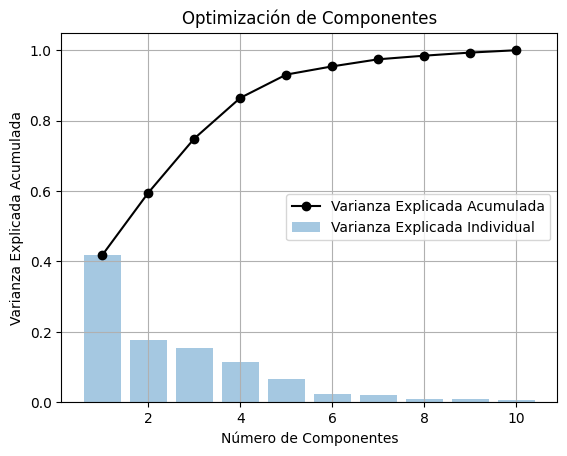

In [59]:
# Plot the cumulative explained variance
plt.plot(
    range(1, len(cumulative_explained_variance_ratio) + 1),
    cumulative_explained_variance_ratio,
    marker="o",
    color="black",
    label="Varianza Explicada Acumulada",
)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.4, label='Varianza Explicada Individual')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Optimización de Componentes")
plt.grid(True)
plt.legend()
plt.show()

Veamos la compresión en un componente:

In [60]:
pca_model_1 = PCA(data=df, ncomp=1, standardize=True, normalize=True)

In [62]:
pca_df_1 = pd.DataFrame(pca_model_1.eigenvecs)

In [63]:
pca_df_1

,eigenvec_0
0,-0.405705
1,0.283616
2,0.155441
3,0.157544
4,0.409582
5,-0.183119
6,0.417834
7,-0.388958
8,0.406076
9,-0.117989


Veamos la compresión en dos componentes:

In [67]:
pca_model_2 = PCA(data=df, ncomp=2, standardize=True, normalize=True)
pca_df_2 = pd.DataFrame(pca_model_2.eigenvecs)
pca_df_2

,eigenvec_0,eigenvec_1
0,-0.405705,-0.314081
1,0.283616,-0.093253
2,0.155441,-0.075542
3,0.157544,0.030863
4,0.409582,-0.306641
5,-0.183119,-0.258949
6,0.417834,0.179814
7,-0.388958,-0.331508
8,0.406076,-0.343722
9,-0.117989,0.681571


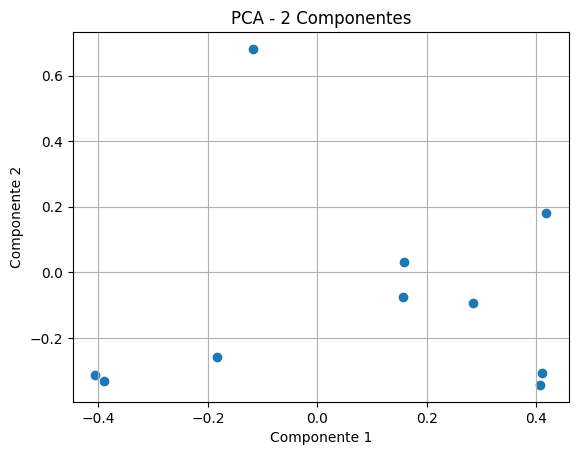

In [100]:
plt.scatter(pca_df_2['eigenvec_0'], pca_df_2['eigenvec_1'])
plt.title("PCA - 2 Componentes")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

Veamos la compresión en tres componentes:

In [65]:
pca_model_3 = PCA(data=df, ncomp=3, standardize=True, normalize=True)
pca_df_3 = pd.DataFrame(pca_model_3.eigenvecs)
pca_df_3

,eigenvec_0,eigenvec_1,eigenvec_2
0,-0.405705,-0.314081,0.140671
1,0.283616,-0.093253,0.602529
2,0.155441,-0.075542,-0.258737
3,0.157544,0.030863,0.689736
4,0.409582,-0.306641,-0.038756
5,-0.183119,-0.258949,-0.060205
6,0.417834,0.179814,-0.196355
7,-0.388958,-0.331508,0.098969
8,0.406076,-0.343722,-0.114063
9,-0.117989,0.681571,0.089459


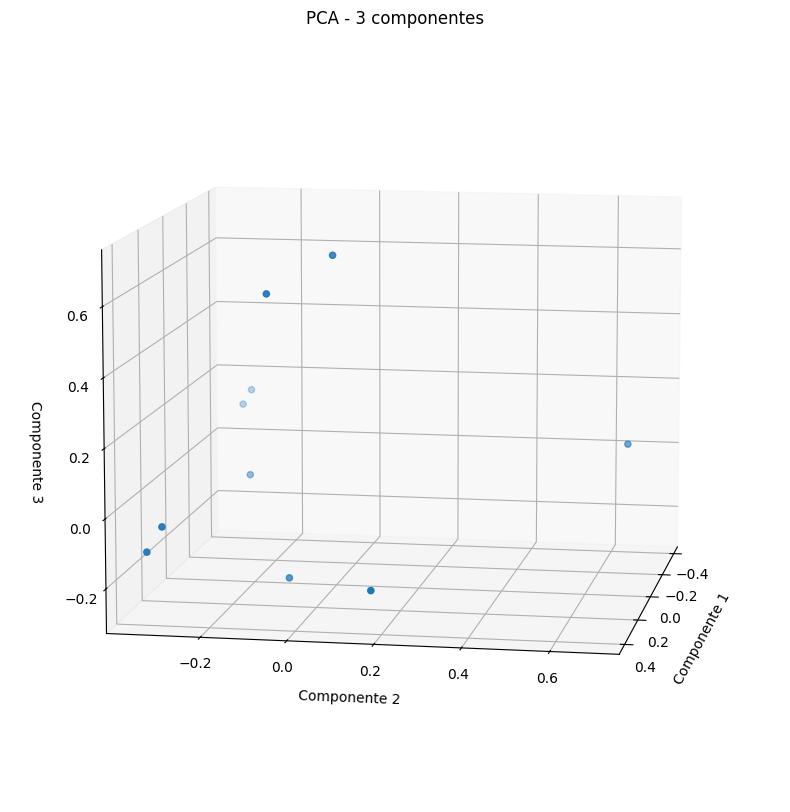

In [99]:
# Proceed with plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
x = np.array(pca_df_3['eigenvec_0'])
y = np.array(pca_df_3['eigenvec_1'])
z = np.array(pca_df_3['eigenvec_2'])

# Scatter plot for the 'df1' data
ax.scatter(x, y, z)

# Set labels and title
plt.title('PCA - 3 componentes')
ax.set_xlabel('Componente 1', labelpad=10)
ax.set_ylabel('Componente 2', labelpad=10)
ax.set_zlabel('Componente 3', labelpad=10)

ax.view_init(elev=10., azim=10)

# Show the plot
plt.show()

De este modo, ¡reducimos las dimensiones! En la próxima notebook pasaremos a la sección de modelización y compararemos el rendimiento de los dos conjuntos de datos,

**Preguntas Teóricas**

1) Definición y Propósito: ¿Qué es el Análisis de Componentes Principales (PCA) y para qué se utiliza?
2) Matemáticas detrás del PCA: ¿Cuál es el principio matemático sobre el que se basa el PCA? ¿Cómo se calculan los componentes principales?
3) Varianza: ¿Por qué es importante la varianza en el PCA? ¿Cómo se relaciona con los componentes principales?
4) Covarianza: Explique el concepto de matriz de covarianza en el contexto de PCA. ¿Por qué es importante?
5) Dimensionalidad: ¿Cómo ayuda el PCA a reducir la dimensionalidad de los datos? ¿Qué implica esto para el análisis de grandes conjuntos de datos?
6) Interpretación de Componentes: ¿Cómo se interpretan los componentes principales obtenidos a través de PCA?
7) Diferencia entre PCA y análisis factorial: ¿En qué se diferencia el PCA del análisis factorial?

**Preguntas Aplicadas**

8) Selección de Componentes: Dada una salida de PCA, ¿cómo decidirías cuántos componentes principales retener para tu análisis?
9) Preprocesamiento de Datos: ¿Por qué es importante estandarizar los datos antes de aplicar PCA? ¿Qué efecto tiene en los resultados?
10) Caso Práctico: Se te proporciona un conjunto de datos multidimensional. Describe cómo aplicarías PCA paso a paso y cómo interpretarías los resultados.
11) Visualización de Datos: ¿Cómo puede usarse PCA para visualizar datos de alta dimensión? Proporciona un ejemplo.
12) Limitaciones y Consideraciones: ¿Cuáles son algunas de las limitaciones del PCA? ¿En qué situaciones podría no ser el método más adecuado?
13) Software y Herramientas: Menciona algunas herramientas o librerías software que se pueden utilizar para realizar PCA. ¿Cómo implementarías una análisis de PCA usando una de estas herramientas?

**La preguntas más importante sería: Qué precio se está pagando por aplicar PCA?**

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)